In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sb
pd.set_option('display.max_columns', None) #all columns are displayed
pd.set_option('display.max_rows', None) #all rows are displayed

In [2]:
location = "C:\MADS\Introduction To ML learning\Credit Card\Credit_card_clients.csv"
CreditCard = pd.read_csv(location, sep= ';', header = 1)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\BErmers\AppData\Local\Temp\ipykernel_12132\3592223650.py:1: SyntaxWarning: invalid escape sequence '\M'
  location = "C:\MADS\Introduction To ML learning\Credit Card\Credit_card_clients.csv"


In [3]:
CreditCard.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split
xdata = CreditCard.drop('default payment next month', axis = 1)
ydata = CreditCard['default payment next month']
xtrn, xtst, ytrn, ytst = train_test_split(xdata, ydata, random_state = 42, test_size = 0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

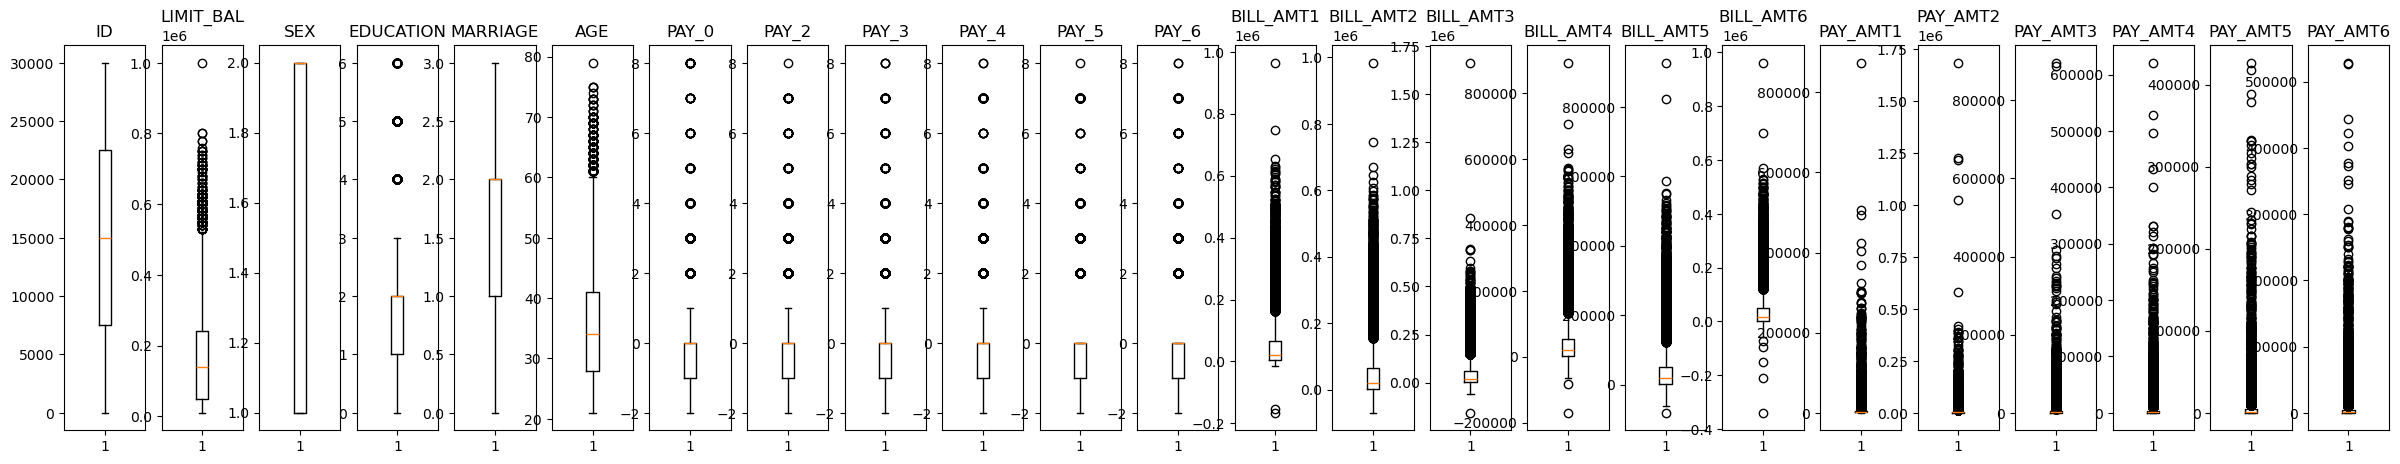

In [5]:
columns_to_plot = [col for col in xdata.columns]

fig, axes = plt.subplots(nrows= 1, ncols = len(columns_to_plot), figsize=(30,5))

for ax, col in zip(axes, columns_to_plot):
    ax.boxplot(xdata[col])
    ax.set_title(f'{col}')

plt.tight_layout
plt.show

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier


all_columns = [col for col in xdata.columns]
categorical_columns = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
numeric_columns = [col for col in all_columns if col not in categorical_columns]

scaler = StandardScaler()
OneHot = OneHotEncoder(handle_unknown = 'ignore', sparse_output= False)

preprocess = ColumnTransformer([
    ('num', scaler, numeric_columns),
    ('cat', OneHot, categorical_columns)
])

xtrn_transform = preprocess.fit_transform(xtrn)
xtrn_features = ColumnTransformer.get_feature_names_out(preprocess)
xtrn_new = pd.DataFrame(xtrn_transform, columns = xtrn_features)
xtrn_new.head()

,num__ID,num__LIMIT_BAL,num__AGE,num__BILL_AMT1,num__BILL_AMT2,num__BILL_AMT3,num__BILL_AMT4,num__BILL_AMT5,num__BILL_AMT6,num__PAY_AMT1,num__PAY_AMT2,num__PAY_AMT3,num__PAY_AMT4,num__PAY_AMT5,num__PAY_AMT6,cat__SEX_1,cat__SEX_2,cat__EDUCATION_0,cat__EDUCATION_1,cat__EDUCATION_2,cat__EDUCATION_3,cat__EDUCATION_4,cat__EDUCATION_5,cat__EDUCATION_6,cat__MARRIAGE_0,cat__MARRIAGE_1,cat__MARRIAGE_2,cat__MARRIAGE_3,cat__PAY_0_-2,cat__PAY_0_-1,cat__PAY_0_0,cat__PAY_0_1,cat__PAY_0_2,cat__PAY_0_3,cat__PAY_0_4,cat__PAY_0_5,cat__PAY_0_6,cat__PAY_0_7,cat__PAY_0_8,cat__PAY_2_-2,cat__PAY_2_-1,cat__PAY_2_0,cat__PAY_2_1,cat__PAY_2_2,cat__PAY_2_3,cat__PAY_2_4,cat__PAY_2_5,cat__PAY_2_6,cat__PAY_2_7,cat__PAY_3_-2,cat__PAY_3_-1,cat__PAY_3_0,cat__PAY_3_1,cat__PAY_3_2,cat__PAY_3_3,cat__PAY_3_4,cat__PAY_3_5,cat__PAY_3_6,cat__PAY_3_7,cat__PAY_3_8,cat__PAY_4_-2,cat__PAY_4_-1,cat__PAY_4_0,cat__PAY_4_1,cat__PAY_4_2,cat__PAY_4_3,cat__PAY_4_4,cat__PAY_4_5,cat__PAY_4_6,cat__PAY_4_7,cat__PAY_4_8,cat__PAY_5_-2,cat__PAY_5_-1,cat__PAY_5_0,cat__PAY_5_2,cat__PAY_5_3,cat__PAY_5_4,cat__PAY_5_5,cat__PAY_5_6,cat__PAY_5_7,cat__PAY_6_-2,cat__PAY_6_-1,cat__PAY_6_0,cat__PAY_6_2,cat__PAY_6_3,cat__PAY_6_4,cat__PAY_6_5,cat__PAY_6_6,cat__PAY_6_7,cat__PAY_6_8
0,-0.251522,-0.678684,1.247407,1.967518,2.099894,2.219011,-0.675786,-0.668672,0.167079,-0.010175,0.001467,-0.295275,-0.306144,2.687452,-0.189767,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.401936,0.400292,-0.055111,-0.586114,-0.531902,-0.656298,-0.675786,-0.650096,-0.651154,0.327402,-0.175741,-0.295275,-0.235277,-0.268974,-0.294504,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.592415,1.016850,-0.272197,0.353234,-0.704757,-0.684409,-0.686607,-0.680172,-0.671358,-0.318393,-0.222410,-0.295275,-0.306144,-0.299544,-0.008650,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.106524,-0.678684,1.898666,-0.270858,-0.237129,-0.196689,-0.145012,-0.092730,-0.059786,-0.232051,-0.165767,-0.225938,-0.226364,-0.221896,-0.219382,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.495759,2.558244,-0.380741,-0.513190,-0.640623,-0.566738,0.527331,0.564161,0.644261,-0.103240,0.051593,4.093977,-0.091395,-0.051621,-0.164955,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


categories in category pay that arent in the test data. Payment delay for 8 month was not in the training set but was in the test set.


In [7]:
from sklearn.metrics import accuracy_score, recall_score,precision_score

KNC005 = KNeighborsClassifier(n_neighbors=5)
KNC100 = KNeighborsClassifier(n_neighbors=100)

models = {
    "KNC100": KNC100,
    "KNC005": KNC005
}

score_functions = {
     "Accuracy": accuracy_score,
     "Recall": recall_score, 
     "Precision": precision_score
} 

def run_models(xtrn, ytrn, xtst, ytst, models, score_functions):
    predictions_tst = {}
    scores_tst = {}
    prediction_proba = {}

    for model_name, model in models.items():
        pipeline = make_pipeline(preprocess, model)
        pipeline.fit(xtrn,ytrn)
        y_pred = pipeline.predict(xtst)
        p_pred = pipeline.predict_proba(xtst)
        predictions_tst[model_name] = y_pred
        prediction_proba[model_name] = p_pred

        scores_tst[model_name] = {
            score_name: score_func(ytst, y_pred)
            for score_name, score_func in score_functions.items()
        }

    return pd.DataFrame(predictions_tst), pd.DataFrame(scores_tst).T, pd.Series(prediction_proba).T

In [8]:
predictions_tst, scores_tst, prediction_proba = run_models(xtrn, ytrn, xtst, ytst, models, score_functions)

Low recall on both models, precision is somewhat higher on the KNC100 model. Accuracy equal for both models. Low recall tells us the predictions are wrong on most of the actual positive cases. Its predicting negatives when the actual is positive. 

first record in array is probablity rate that the default equals 0, second part equals 1.

why does my knc005 give a 1 digit rounded result (i.e 0.8) and the knc100 (i.e. 0.79) a two digit? 

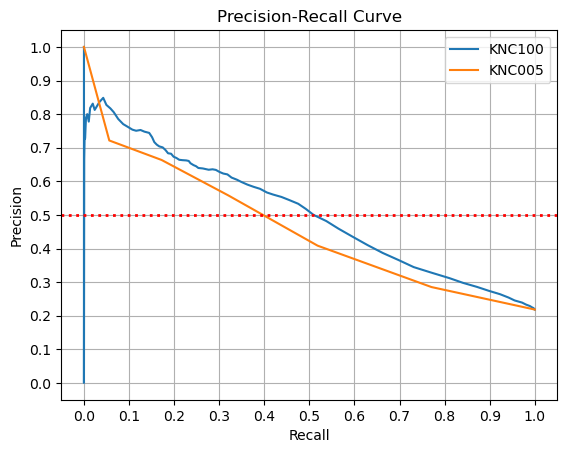

In [9]:
from sklearn.metrics import precision_recall_curve
for model_name, proba in prediction_proba.items():
    positive_proba = proba[:, 1]
    precision, recall, thresholds = precision_recall_curve(ytst, positive_proba)
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='dotted', linewidth=2)
plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

why did my precision drop?

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


KNC100 = KNeighborsClassifier(n_neighbors=100)
lreg = LogisticRegression()
rfc = RandomForestClassifier(random_state= 42)
GNB = GaussianNB()

models = {
    "KNeighbors100": KNC100,
    "LogisticRegression": lreg,
    "RandomForest": rfc,
    "GaussianNB": GNB,
}

def run_models_cv(xtrn, ytrn, models):
    prediction_proba = {}
    predictions = {}

    for model_name, model in models.items():
        pipeline = make_pipeline(preprocess, model)
        y_pred = cross_val_predict(pipeline,xtrn,ytrn,cv=3)
        y_pred_proba = cross_val_predict(pipeline,xtrn,ytrn,cv=3, method = 'predict_proba')
        predictions[model_name] = y_pred
        prediction_proba [model_name] = y_pred_proba


    return pd.Series(prediction_proba),pd.DataFrame(predictions), pd.DataFrame(y_pred_proba)

In [ ]:
prediction_proba, predictions, y_pred_proba = run_models_cv(xtrn, ytrn, models)

KNeighbors100: threshold when precision ≥ 0.5 is 0.240 recall 0.497
LogisticRegression: threshold when precision ≥ 0.5 is 0.235 recall 0.565
RandomForest: threshold when precision ≥ 0.5 is 0.310 recall 0.563
GaussianNB: threshold when precision ≥ 0.5 is 0.000 recall 0.433


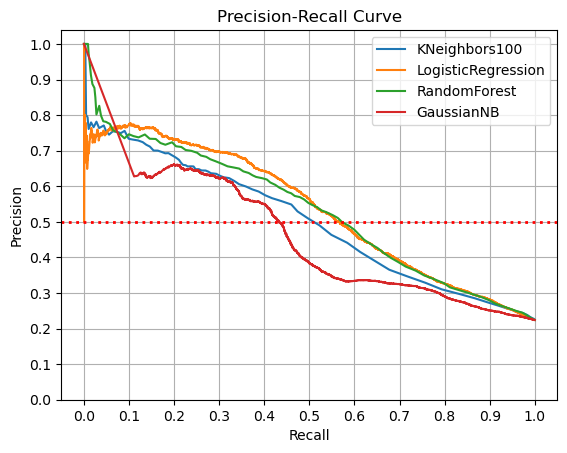

In [12]:
thresholds_model ={}

for model_name, proba in prediction_proba.items():
    proba = proba[:, 1] # predictions of positive class | p/r curve needs 1d input
    precision, recall, thresholds = precision_recall_curve(ytrn, proba)

    index = np.where(precision >= 0.5)[0]
    best_index = index[np.argmax(recall[index])]
    best_threshold = thresholds[best_index]
    thresholds_model[model_name] = best_threshold
    print(f"{model_name}: threshold when precision ≥ 0.5 is {best_threshold:.3f} recall {recall[best_index]:.3f}")
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='dotted', linewidth=2)
plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

Linear regression scores with the highest recall, almost equal to the randomforest.

i added a Naives Bayes Classifier, but the treshhold is 0.00. Wonder what it would mean, basicly its has from the first idex it already had > 0.5 precision, but it staggers later on. (maybe add visual). I read that the Gaussian Naive Bayes doesnt assumes feature independence and it doesnt work well with continuous features. 

In [22]:
def run_models_new(xtrn, ytrn, xtst, ytst, models, score_functions):
    predictions_tst = {}
    scores_tst = {}
    scores_cv = {}
    TST_prediction_proba ={}

    for model_name, model in models.items():
        pipeline = make_pipeline(preprocess, model)
        pipeline.fit(xtrn,ytrn)
        y_pred_tst = pipeline.predict_proba(xtst) 
        y_pred_trn_cv = cross_val_predict(pipeline,xtrn,ytrn,cv=3, method = 'predict_proba')
        TST_prediction_proba[model_name] = y_pred_tst[:, 1]
        threshold = thresholds_model.get(model_name)

        y_pred_trn = (y_pred_trn_cv[:, 1] >= threshold).astype(int)
        y_pred_tst = (y_pred_tst[:, 1] >= threshold).astype(int)

        scores_tst[model_name] = {
            score_name: score_func(ytst, y_pred_tst)
            for score_name, score_func in score_functions.items()
        }

        scores_cv[model_name] = {
            score_name: score_func(ytrn, y_pred_trn)
            for score_name, score_func in score_functions.items()
        }

    return pd.DataFrame(predictions_tst), pd.DataFrame(scores_tst).T, pd.Series(prediction_proba).T, pd.DataFrame(scores_cv).T

In [23]:
predictions_tst, scores_tst, prediction_proba, scores_cv = run_models_new(xtrn, ytrn, xtst, ytst, models, score_functions)

In [ ]:
scores_tst

,Accuracy,Recall,Precision
KNeighbors100,0.781667,0.509313,0.500000
LogisticRegression,0.779667,0.580458,0.496086
RandomForest,0.779800,0.565496,0.496249
GaussianNB,0.813667,0.370076,0.623457


In [24]:
scores_cv

,Accuracy,Recall,Precision
KNeighbors100,0.780267,0.496578,0.509930
LogisticRegression,0.775933,0.564713,0.500000
RandomForest,0.781200,0.563225,0.510656
GaussianNB,0.775933,0.433204,0.500000
